In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")

# Load json file to a Dataframe

## Compute score of genres, directors, actors, keywords, writers

Preprocess function

In [2]:
from preprocess import time_str_to_num
def compute_score(data_train, rounded=True):
    genres_score = {}
    actors_score = {}
    keywords_score = {}
    directors_score = {}
    writers_score = {}
    for line in data_train:
        line = dict(line)
        rating = int(float(line["imdb_rating"])
                     ) if rounded else float(line["imdb_rating"])

        def f(attr_name, attrs_score):
            attrs = line[attr_name].split(',') if type(
                line[attr_name]) == str else line[attr_name]
            for attr in attrs:
                if attr in attrs_score:
                    attrs_score[attr][0] += rating
                    attrs_score[attr][1] += 1
                else:
                    attrs_score[attr] = [rating, 1]
                    
        f('genres', genres_score)
        f('actors', actors_score)
        f('keywords', keywords_score)
        f('directors', directors_score)
        f('writers', writers_score)

    return {'genres': genres_score, 'actor': actors_score, 'keyword': keywords_score, 'director': directors_score, 'writer': writers_score}

In [3]:
file = open('crawler/data1.json', "r")
raw_data = []
lines = file.read().splitlines()
for line in lines:
    raw_data.append(json.loads(line))
scores = compute_score(raw_data)

print('number of genre:', len(scores['genres']))
print('number of actor:', len(scores['actor']))
print('number of keyword:', len(scores['keyword']))
print('number of director:', len(scores['director']))
print('number of writer:', len(scores['writer']))

number of genre: 22
number of actor: 19376
number of keyword: 14789
number of director: 6247
number of writer: 14046


In [4]:
data = []
for category, dict_score in scores.items():
    for name, rc in dict_score.items(): #rc: rating and count
        data += [[name, category, rc[0], rc[1]]]
score_df = pd.DataFrame(data=data, columns=['name', 'category', 'total_imdb_rating', 'count'])
score_df['score'] = score_df['total_imdb_rating'] / score_df['count']
score_df

,name,category,total_imdb_rating,count,score
0,Comedy,genres,18814,3546,5.305697
1,Horror,genres,6964,1605,4.338941
2,Thriller,genres,13503,2691,5.017837
3,Crime,genres,9249,1686,5.485765
4,Drama,genres,30023,5339,5.623338
...,...,...,...,...,...
54475,Jonathan Schwartz,writer,6,1,6.000000
54476,Lindsay Stidham,writer,6,1,6.000000
54477,Manuel Sanchez,writer,3,1,3.000000
54478,Samuel Oldham,writer,3,1,3.000000


## Load data1.json

Import data1.json to Dataframe

In [5]:
raw_df = pd.read_json('crawler/data1.json', lines=True)
data2_df = pd.read_json('crawler/data2.json', lines=True)

In [6]:
#t = raw_df[raw_df['awards_oscar'].notna()]
raw_df['runtime'] = pd.Series([time_str_to_num(time) for time in raw_df['runtime']])

In [7]:
raw_df

,title,year,rated,runtime,genres,directors,writers,actors,awards_oscar,awards_other,imdb_votes,metascore,keywords,imdb_rating
0,The Wolf of Snow Hollow,2020,R,83,"Comedy,Horror,Thriller",Jim Cummings,Jim Cummings,"Jim Cummings,Riki Lindhome,Robert Forster,Chlo...",None,None,2735,68.0,mountain,6.2
1,Between Earth and Sky,2018,R,97,"Crime,Drama,Horror,Mystery,Thriller",Veena Sud,"Veena Sud,Marcus Seibert,Sebastian Ko","Peter Sarsgaard,Mireille Enos,Joey King,Cas Anvar",None,None,3471,46.0,"girlfriend,dysfunctional family,reference to b...",5.7
2,The Gentlemen,2019,R,113,"Action,Comedy,Crime",Guy Ritchie,"Guy Ritchie,Ivan Atkinson,Marn Davies,Guy Ritchie","Matthew McConaughey,Charlie Hunnam,Michelle Do...",None,None,194988,51.0,"british,gangster,gang,drugs,london england",7.9
3,After We Collided,2020,R,105,"Drama,Romance",Roger Kumble,"Anna Todd,Mario Celaya,Anna Todd","Josephine Langford,Hero Fiennes Tiffin,Louise ...",None,None,5586,NaN,"sequel,boyfriend girlfriend sex,boyfriend girl...",5.3
4,Promising Young Woman,2020,R,113,"Comedy,Crime,Drama,Thriller",Emerald Fennell,Emerald Fennell,"Carey Mulligan,Bo Burnham,Laverne Cox,Clancy B...",None,None,415,74.0,"title directed by female,title produced by fem...",6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10323,Ramona,1936,Approved,84,"Drama,Romance",Henry King,"Helen Hunt Jackson,Lamar Trotti,Stuart Anthony...","Loretta Young,Don Ameche,Kent Taylor,Pauline F...",None,None,262,NaN,"native american,ranch,racism,murder,mexican am...",6.1
10324,Blood Thirst,1971,GP,74,Horror,Newt Arnold,N.I.P. Dennis,"Robert Winston,Katherine Henryk,Yvonne Nielson...",None,None,318,NaN,"rapid aging,sex crime,murder,murder investigat...",4.5
10325,Crisis in the Kremlin,1992,R,85,"Action,Drama",Jonathan Winfrey,"Catherine Cyran,Jonathan Fernandez,Daryl Haney...","Theodore Bikel,Robert Rusler,Denise Bixler,Dou...",None,None,45,NaN,"cia,russia,independent film",4.5
10326,Douchebag,2010,Not Rated,81,"Comedy,Drama",Drake Doremus,"Andrew Dickler,Drake Doremus,Jonathan Schwartz...","Andrew Dickler,Ben York Jones,Marguerite Morea...",None,None,144,56.0,vegetarian,6.1


In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10328 entries, 0 to 10327
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         10328 non-null  object 
 1   year          10328 non-null  int64  
 2   rated         10328 non-null  object 
 3   runtime       10328 non-null  int64  
 4   genres        10328 non-null  object 
 5   directors     10328 non-null  object 
 6   writers       10328 non-null  object 
 7   actors        10328 non-null  object 
 8   awards_oscar  1211 non-null   object 
 9   awards_other  998 non-null    object 
 10  imdb_votes    10328 non-null  int64  
 11  metascore     3442 non-null   float64
 12  keywords      10328 non-null  object 
 13  imdb_rating   10328 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 1.1+ MB


In [9]:
raw_df.describe()

,year,runtime,imdb_votes,metascore,imdb_rating
count,10328.000000,10328.000000,1.032800e+04,3442.000000,10328.000000
mean,1989.147173,96.644655,2.327735e+04,52.650784,5.725562
std,25.753031,17.803131,9.169427e+04,17.857538,1.213591
min,1912.000000,1.000000,5.000000e+00,1.000000,1.100000
25%,1971.000000,87.000000,4.107500e+02,40.000000,5.000000
50%,1997.000000,94.000000,1.297500e+03,53.000000,5.900000
75%,2011.000000,104.000000,7.694000e+03,65.000000,6.600000
max,2020.000000,300.000000,2.295558e+06,100.000000,9.700000


In [10]:
raw_df.columns

Index(['title', 'year', 'rated', 'runtime', 'genres', 'directors', 'writers',
       'actors', 'awards_oscar', 'awards_other', 'imdb_votes', 'metascore',
       'keywords', 'imdb_rating'],
      dtype='object')

In [11]:
#raw_df.to_csv('data1.csv')

In [12]:
genre1 = []
genre2 = []
for genres in raw_df['genres']:
    list_genre = genres.split(',')
    genre1.append(list_genre[0])
    if len(list_genre) > 1:
        genre2.append(list_genre[1])
raw_df['genre1'] = pd.Series(genre1)
raw_df['genre2'] = pd.Series(genre2)
raw_df

,title,year,rated,runtime,genres,directors,writers,actors,awards_oscar,awards_other,imdb_votes,metascore,keywords,imdb_rating,genre1,genre2
0,The Wolf of Snow Hollow,2020,R,83,"Comedy,Horror,Thriller",Jim Cummings,Jim Cummings,"Jim Cummings,Riki Lindhome,Robert Forster,Chlo...",None,None,2735,68.0,mountain,6.2,Comedy,Horror
1,Between Earth and Sky,2018,R,97,"Crime,Drama,Horror,Mystery,Thriller",Veena Sud,"Veena Sud,Marcus Seibert,Sebastian Ko","Peter Sarsgaard,Mireille Enos,Joey King,Cas Anvar",None,None,3471,46.0,"girlfriend,dysfunctional family,reference to b...",5.7,Crime,Drama
2,The Gentlemen,2019,R,113,"Action,Comedy,Crime",Guy Ritchie,"Guy Ritchie,Ivan Atkinson,Marn Davies,Guy Ritchie","Matthew McConaughey,Charlie Hunnam,Michelle Do...",None,None,194988,51.0,"british,gangster,gang,drugs,london england",7.9,Action,Comedy
3,After We Collided,2020,R,105,"Drama,Romance",Roger Kumble,"Anna Todd,Mario Celaya,Anna Todd","Josephine Langford,Hero Fiennes Tiffin,Louise ...",None,None,5586,NaN,"sequel,boyfriend girlfriend sex,boyfriend girl...",5.3,Drama,Romance
4,Promising Young Woman,2020,R,113,"Comedy,Crime,Drama,Thriller",Emerald Fennell,Emerald Fennell,"Carey Mulligan,Bo Burnham,Laverne Cox,Clancy B...",None,None,415,74.0,"title directed by female,title produced by fem...",6.2,Comedy,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10323,Ramona,1936,Approved,84,"Drama,Romance",Henry King,"Helen Hunt Jackson,Lamar Trotti,Stuart Anthony...","Loretta Young,Don Ameche,Kent Taylor,Pauline F...",None,None,262,NaN,"native american,ranch,racism,murder,mexican am...",6.1,Drama,NaN
10324,Blood Thirst,1971,GP,74,Horror,Newt Arnold,N.I.P. Dennis,"Robert Winston,Katherine Henryk,Yvonne Nielson...",None,None,318,NaN,"rapid aging,sex crime,murder,murder investigat...",4.5,Horror,NaN
10325,Crisis in the Kremlin,1992,R,85,"Action,Drama",Jonathan Winfrey,"Catherine Cyran,Jonathan Fernandez,Daryl Haney...","Theodore Bikel,Robert Rusler,Denise Bixler,Dou...",None,None,45,NaN,"cia,russia,independent film",4.5,Action,NaN
10326,Douchebag,2010,Not Rated,81,"Comedy,Drama",Drake Doremus,"Andrew Dickler,Drake Doremus,Jonathan Schwartz...","Andrew Dickler,Ben York Jones,Marguerite Morea...",None,None,144,56.0,vegetarian,6.1,Comedy,NaN


# Visualization

In [13]:
df = raw_df[['year', 'runtime', 'imdb_votes', 'metascore', 'imdb_rating', 'genre1']]
df

,year,runtime,imdb_votes,metascore,imdb_rating,genre1
0,2020,83,2735,68.0,6.2,Comedy
1,2018,97,3471,46.0,5.7,Crime
2,2019,113,194988,51.0,7.9,Action
3,2020,105,5586,NaN,5.3,Drama
4,2020,113,415,74.0,6.2,Comedy
...,...,...,...,...,...,...
10323,1936,84,262,NaN,6.1,Drama
10324,1971,74,318,NaN,4.5,Horror
10325,1992,85,45,NaN,4.5,Action
10326,2010,81,144,56.0,6.1,Comedy


## Box plot

Text(0.5, 1.0, 'Year')

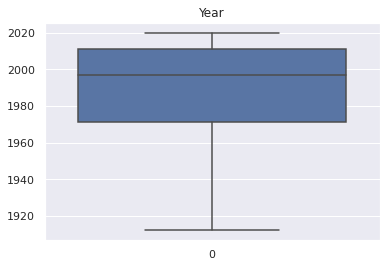

In [14]:
sns.boxplot(data=raw_df['year'])
plt.title('Year')

Text(0.5, 1.0, 'Runtime')

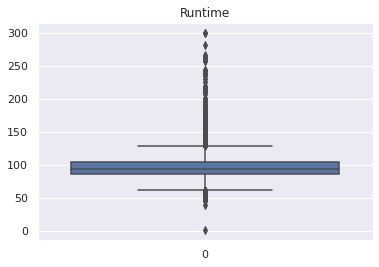

In [15]:
sns.boxplot(data=raw_df['runtime'])
#plt.ylim(50, 150)
plt.title('Runtime')

Text(0.5, 1.0, 'imdb_votes')

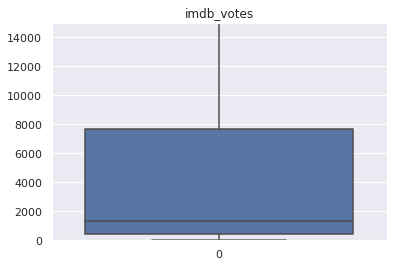

In [15]:
sns.boxplot(data=raw_df['imdb_votes'])
plt.ylim(0, 15000)
plt.title('imdb_votes')

Text(0.5, 1.0, 'Metascore')

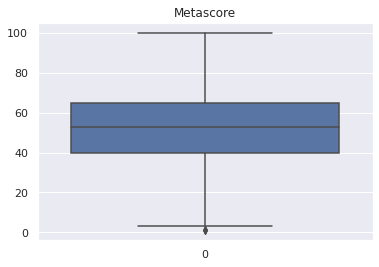

In [16]:
sns.boxplot(data=raw_df['metascore'])
plt.title('Metascore')

Text(0.5, 1.0, 'Imdb rating')

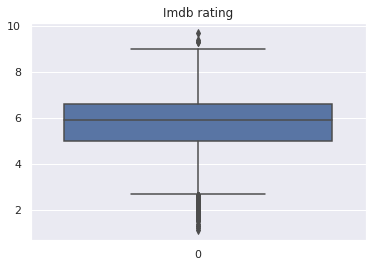

In [17]:
sns.boxplot(data=raw_df['imdb_rating'])
plt.title('Imdb rating')

## Histogram

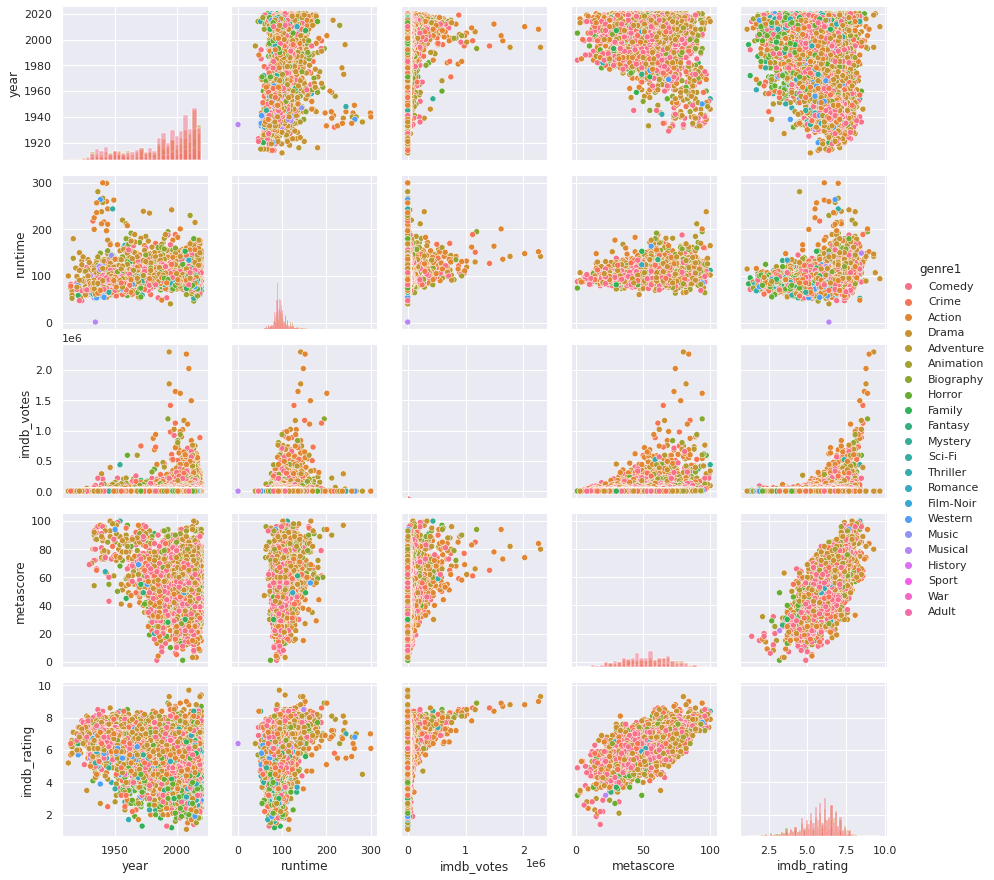

In [19]:
#['year', 'runtime', 'imdb_votes', 'metascore', 'imdb_rating']
g = sns.PairGrid(df, hue='genre1')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

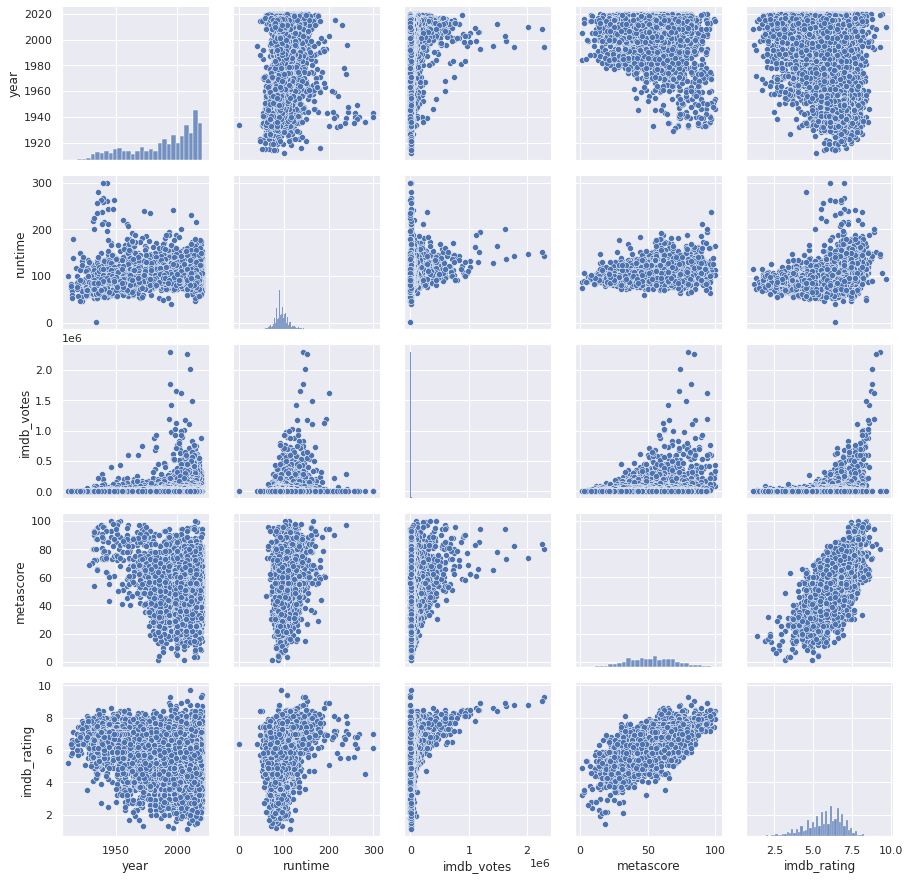

In [20]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

/home/long/anaconda3/envs/DS/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


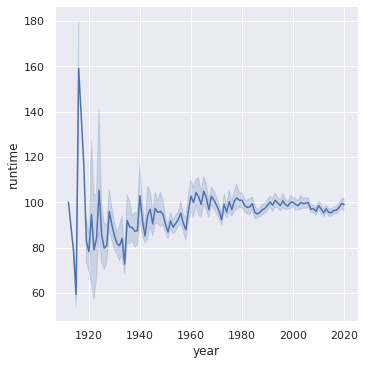

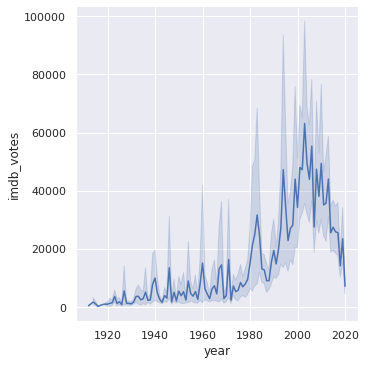

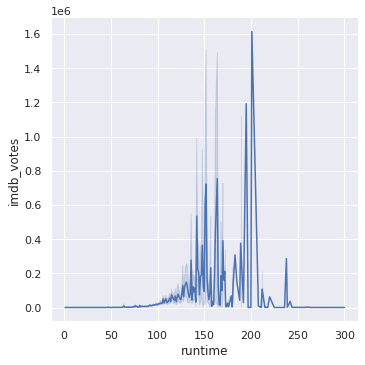

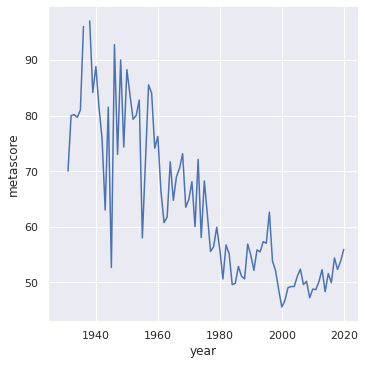

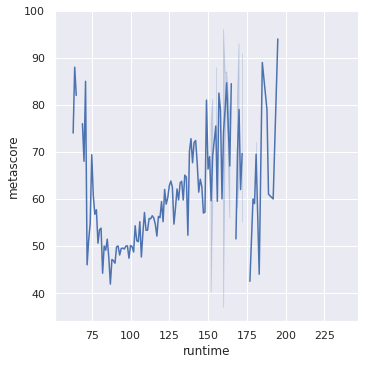

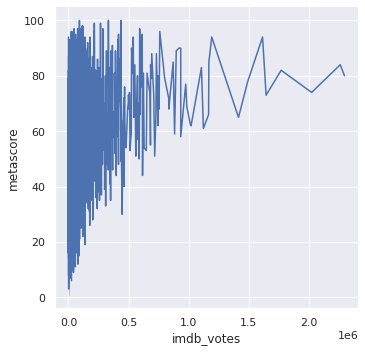

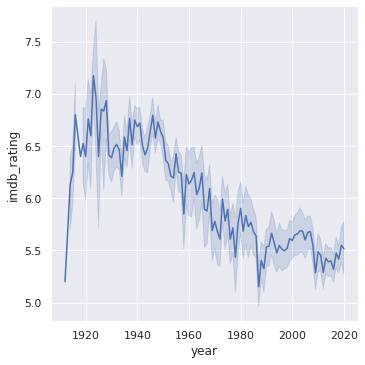

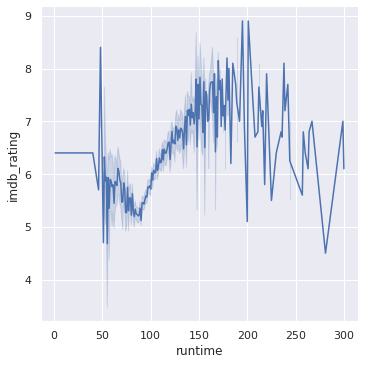

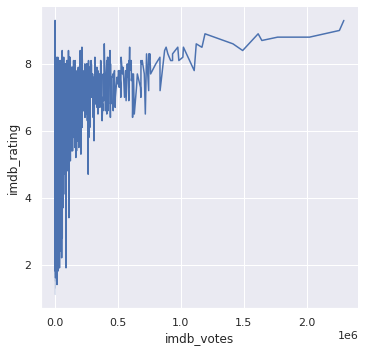

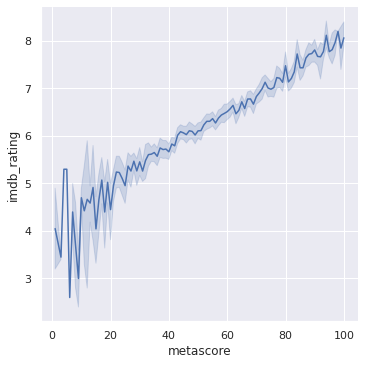

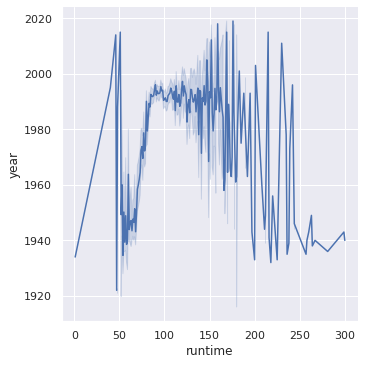

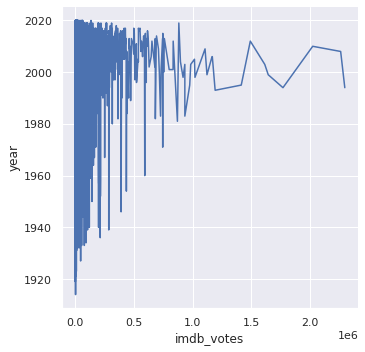

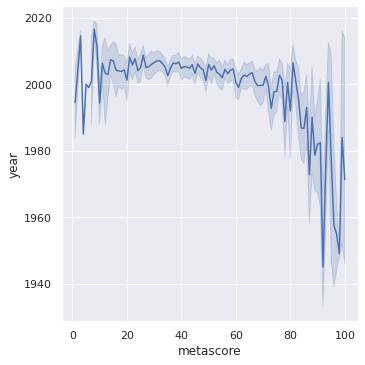

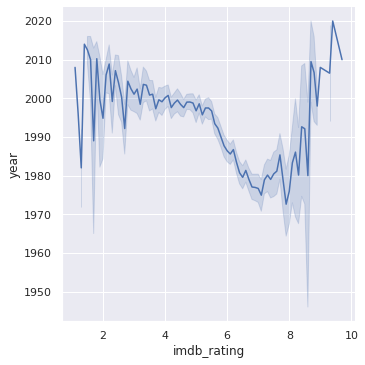

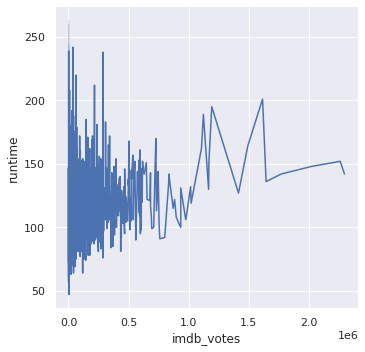

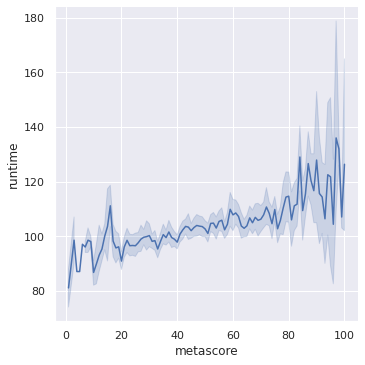

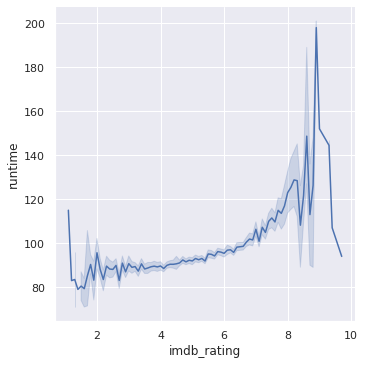

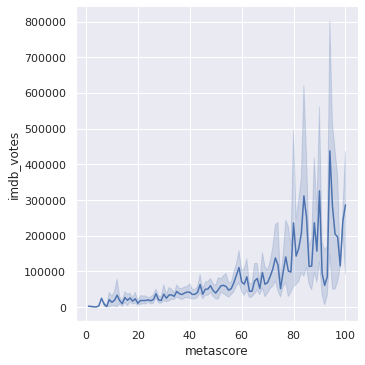

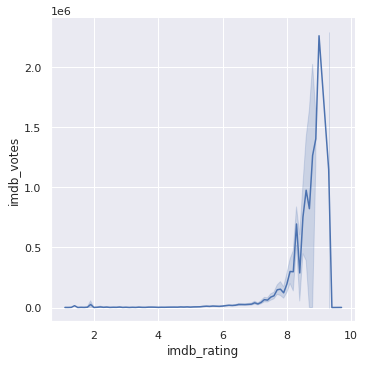

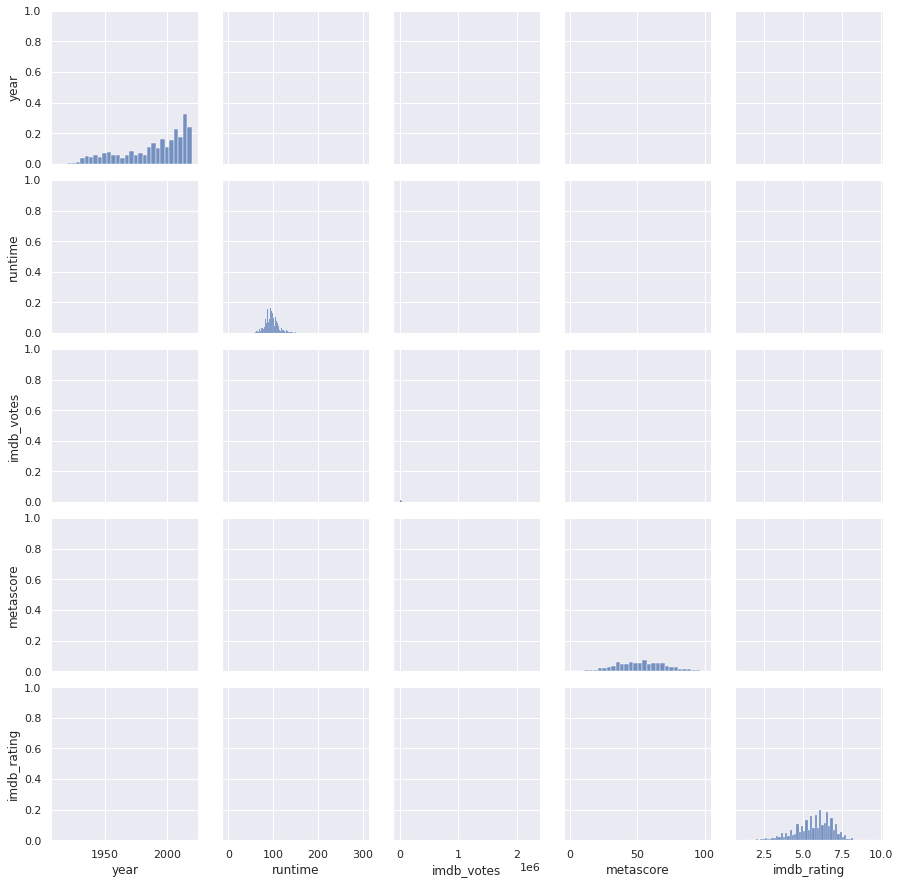

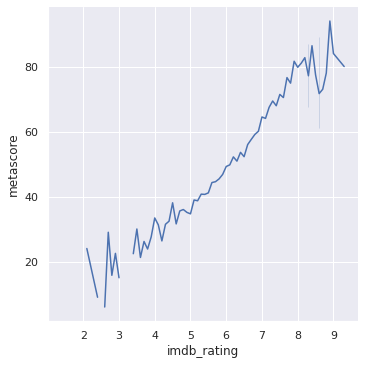

In [21]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.relplot, kind='line')
g.add_legend()

/home/long/anaconda3/envs/DS/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/long/anaconda3/envs/DS/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/long/anaconda3/envs/DS/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/long/anaconda3/envs/DS/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/long/anaconda3/envs/DS/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/long/anaconda3/envs/DS/lib/python3.8/site-packages/seaborn/distributi

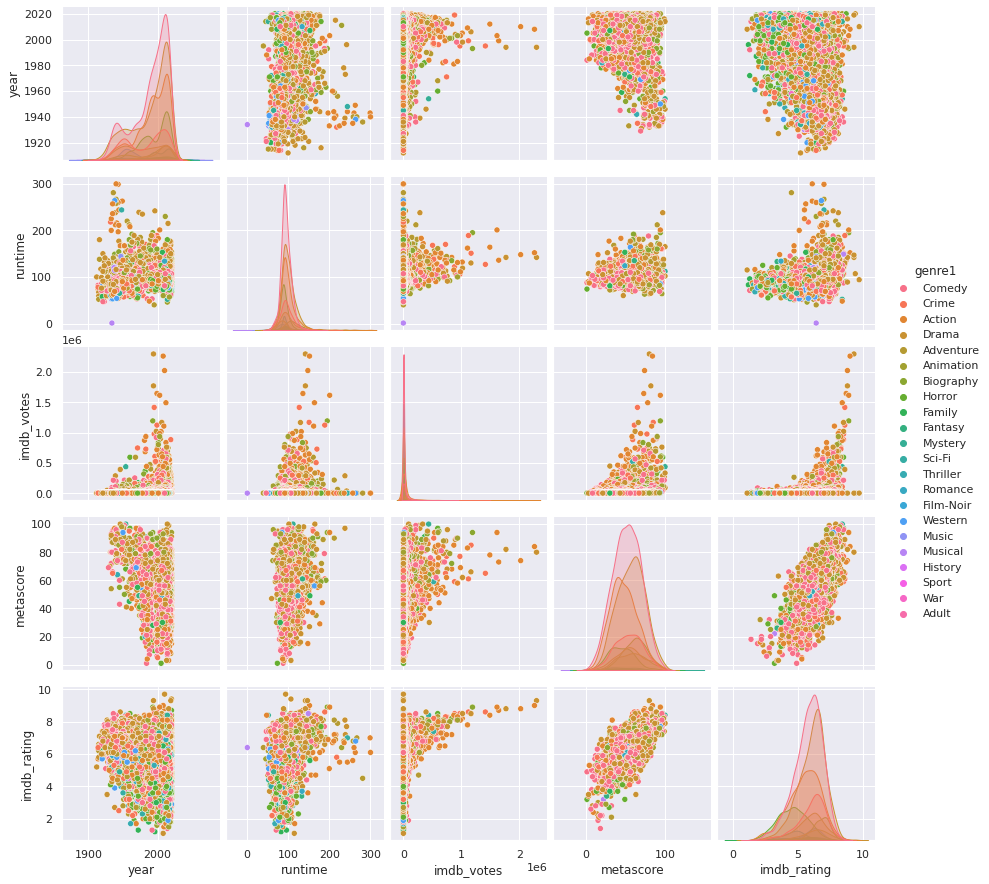

In [22]:
sns.pairplot(df, hue="genre1", height=2.5)

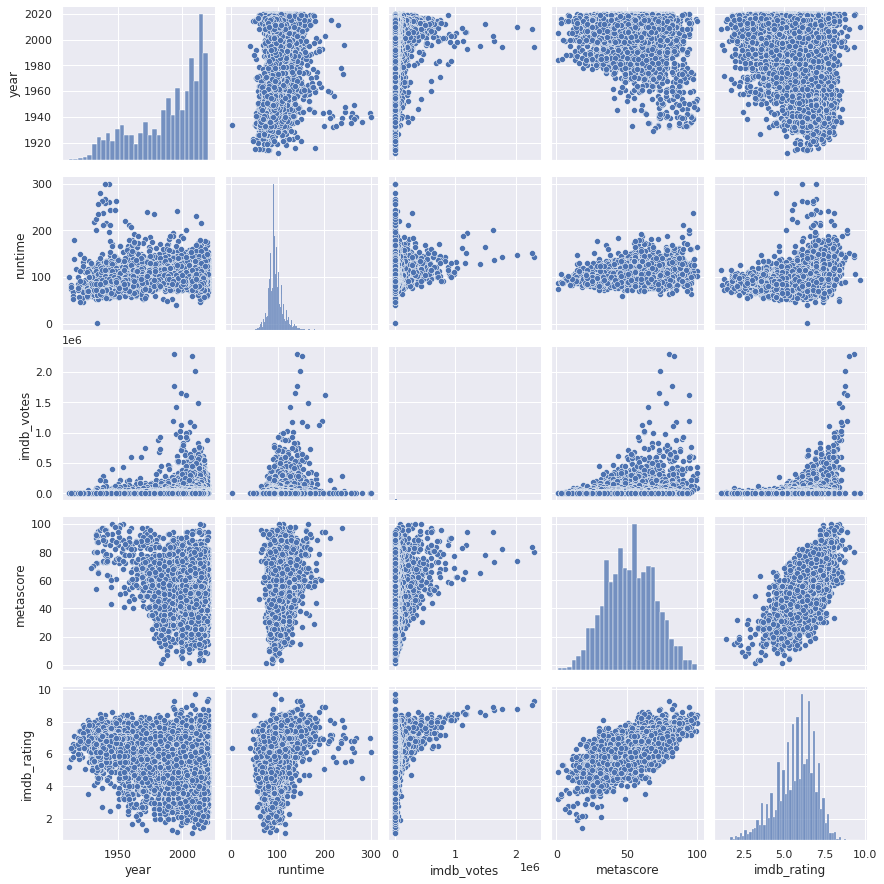

In [23]:
sns.pairplot(df, height=2.5)

<AxesSubplot:xlabel='year', ylabel='Count'>

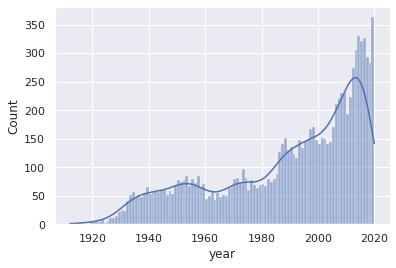

In [24]:
sns.histplot(raw_df['year'], kde=True, binwidth=1)

<AxesSubplot:xlabel='runtime', ylabel='Count'>

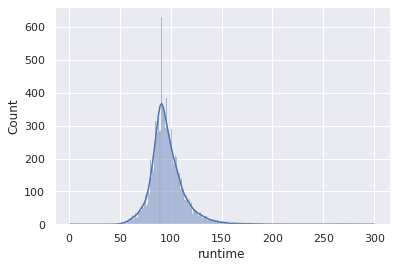

In [25]:
sns.histplot(raw_df['runtime'], kde=True, binwidth=1)

/home/long/anaconda3/envs/DS/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='imdb_votes', ylabel='Density'>

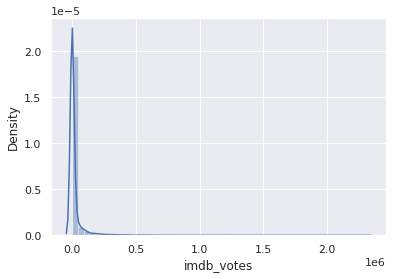

In [26]:
sns.distplot(raw_df['imdb_votes'])

<AxesSubplot:xlabel='metascore', ylabel='Count'>

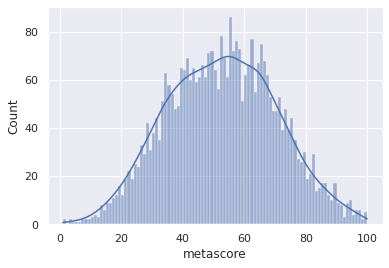

In [19]:
sns.histplot(raw_df['metascore'], kde=True, binwidth=1)

<AxesSubplot:xlabel='imdb_rating', ylabel='Count'>

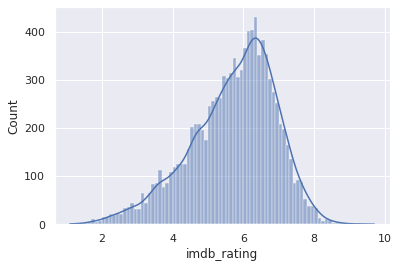

In [28]:
sns.histplot(raw_df['imdb_rating'], kde=True, binwidth=0.1)

## Line plot and scatter plot

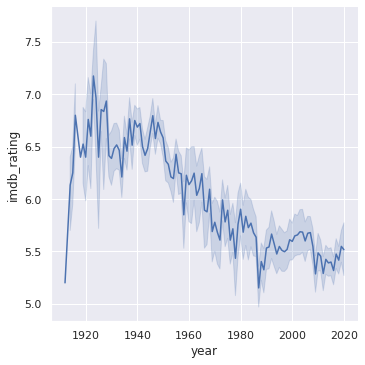

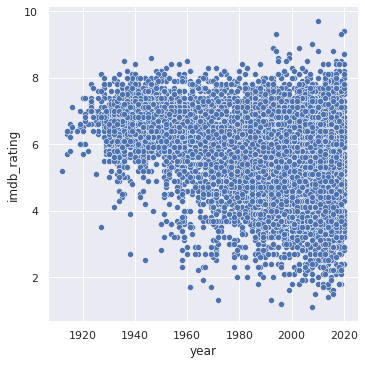

In [29]:
sns.relplot(data=df, x='year', y='imdb_rating', kind='line')
sns.relplot(data=df, x='year', y='imdb_rating')

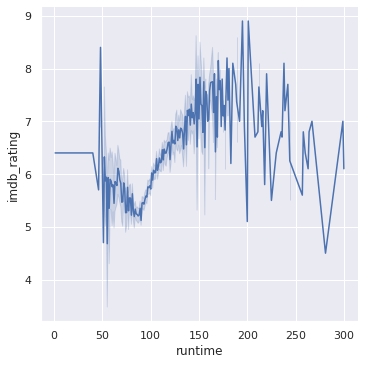

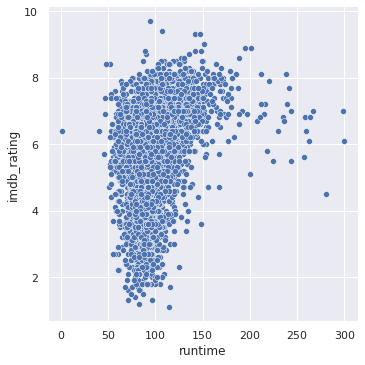

In [30]:
sns.relplot(data=df, x='runtime', y='imdb_rating', kind='line')
sns.relplot(data=df, x='runtime', y='imdb_rating')

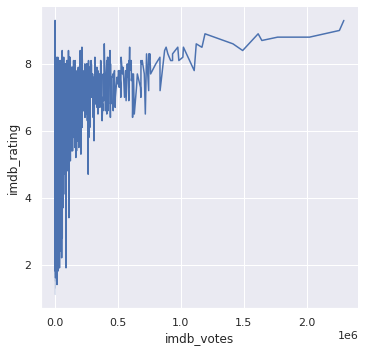

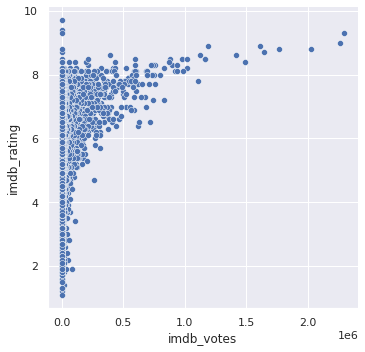

In [31]:
sns.relplot(data=df, x='imdb_votes', y='imdb_rating', kind='line')
sns.relplot(data=df, x='imdb_votes', y='imdb_rating')

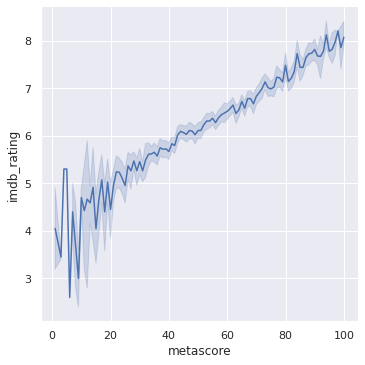

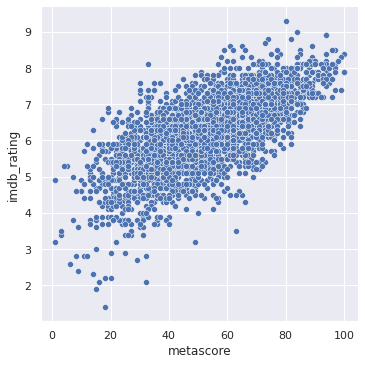

In [32]:
sns.relplot(data=df, x='metascore', y='imdb_rating', kind='line')
sns.relplot(data=df, x='metascore', y='imdb_rating')

(50.0, 150.0)

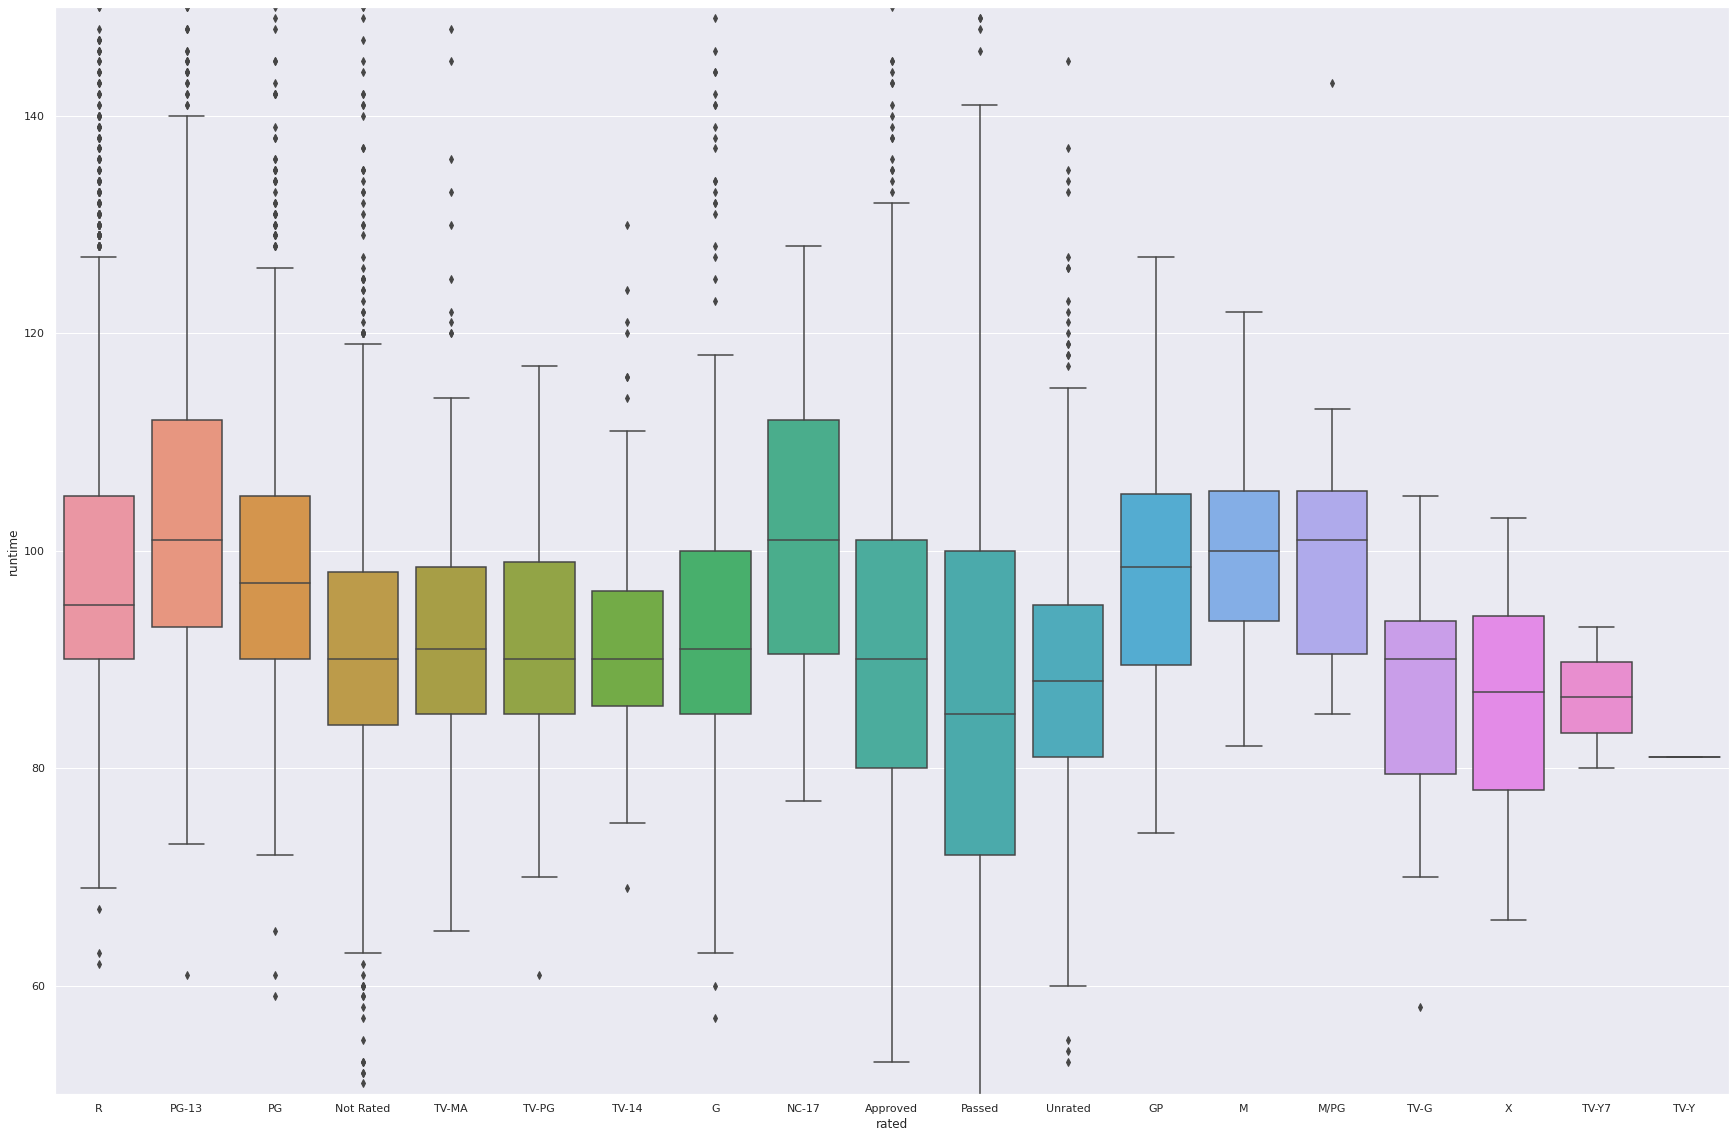

In [33]:
plt.figure(figsize=(30,20))
sns.boxplot(x='rated', y='runtime', data=raw_df)
plt.ylim(50, 150)

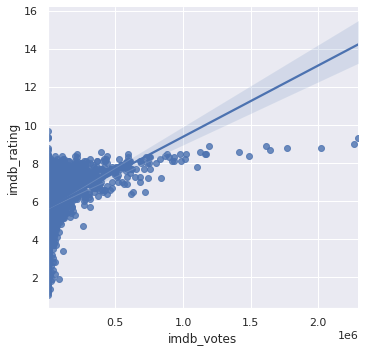

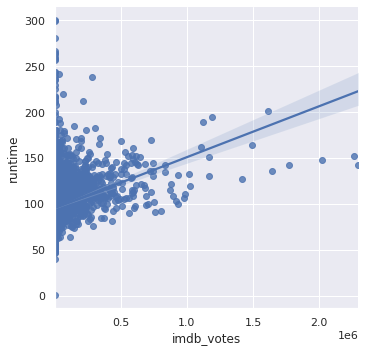

In [34]:
#sns.relplot(data=raw_df, x='imdb_votes', y='imdb_rating')
sns.lmplot(data=raw_df, x='imdb_votes', y='imdb_rating')
sns.lmplot(data=raw_df, x='imdb_votes', y='runtime')

# Score_df visualization

In [20]:
raw_df[['genres', 'actors', 'directors', 'keywords', 'writers']]

,genres,actors,directors,keywords,writers
0,"Comedy,Horror,Thriller","Jim Cummings,Riki Lindhome,Robert Forster,Chlo...",Jim Cummings,mountain,Jim Cummings
1,"Crime,Drama,Horror,Mystery,Thriller","Peter Sarsgaard,Mireille Enos,Joey King,Cas Anvar",Veena Sud,"girlfriend,dysfunctional family,reference to b...","Veena Sud,Marcus Seibert,Sebastian Ko"
2,"Action,Comedy,Crime","Matthew McConaughey,Charlie Hunnam,Michelle Do...",Guy Ritchie,"british,gangster,gang,drugs,london england","Guy Ritchie,Ivan Atkinson,Marn Davies,Guy Ritchie"
3,"Drama,Romance","Josephine Langford,Hero Fiennes Tiffin,Louise ...",Roger Kumble,"sequel,boyfriend girlfriend sex,boyfriend girl...","Anna Todd,Mario Celaya,Anna Todd"
4,"Comedy,Crime,Drama,Thriller","Carey Mulligan,Bo Burnham,Laverne Cox,Clancy B...",Emerald Fennell,"title directed by female,title produced by fem...",Emerald Fennell
...,...,...,...,...,...
10323,"Drama,Romance","Loretta Young,Don Ameche,Kent Taylor,Pauline F...",Henry King,"native american,ranch,racism,murder,mexican am...","Helen Hunt Jackson,Lamar Trotti,Stuart Anthony..."
10324,Horror,"Robert Winston,Katherine Henryk,Yvonne Nielson...",Newt Arnold,"rapid aging,sex crime,murder,murder investigat...",N.I.P. Dennis
10325,"Action,Drama","Theodore Bikel,Robert Rusler,Denise Bixler,Dou...",Jonathan Winfrey,"cia,russia,independent film","Catherine Cyran,Jonathan Fernandez,Daryl Haney..."
10326,"Comedy,Drama","Andrew Dickler,Ben York Jones,Marguerite Morea...",Drake Doremus,vegetarian,"Andrew Dickler,Drake Doremus,Jonathan Schwartz..."


In [21]:
score_df

,name,category,total_imdb_rating,count,score
0,Comedy,genres,18814,3546,5.305697
1,Horror,genres,6964,1605,4.338941
2,Thriller,genres,13503,2691,5.017837
3,Crime,genres,9249,1686,5.485765
4,Drama,genres,30023,5339,5.623338
...,...,...,...,...,...
54475,Jonathan Schwartz,writer,6,1,6.000000
54476,Lindsay Stidham,writer,6,1,6.000000
54477,Manuel Sanchez,writer,3,1,3.000000
54478,Samuel Oldham,writer,3,1,3.000000


In [22]:
genres = score_df[score_df['category']=='genres']
actors = score_df[score_df['category']=='actor']
directors = score_df[score_df['category']=='director']
keywords = score_df[score_df['category']=='keyword']
writers = score_df[score_df['category']=='writer']
genres

,name,category,total_imdb_rating,count,score
0,Comedy,genres,18814,3546,5.305697
1,Horror,genres,6964,1605,4.338941
2,Thriller,genres,13503,2691,5.017837
3,Crime,genres,9249,1686,5.485765
4,Drama,genres,30023,5339,5.623338
5,Mystery,genres,5032,943,5.336161
6,Action,genres,8892,1770,5.023729
7,Romance,genres,12817,2259,5.673749
8,Adventure,genres,6512,1221,5.333333
9,Family,genres,4026,748,5.382353


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Comedy'),
  Text(1, 0, 'Horror'),
  Text(2, 0, 'Thriller'),
  Text(3, 0, 'Crime'),
  Text(4, 0, 'Drama'),
  Text(5, 0, 'Mystery'),
  Text(6, 0, 'Action'),
  Text(7, 0, 'Romance'),
  Text(8, 0, 'Adventure'),
  Text(9, 0, 'Family'),
  Text(10, 0, 'Fantasy'),
  Text(11, 0, 'Musical'),
  Text(12, 0, 'Sci-Fi'),
  Text(13, 0, 'History'),
  Text(14, 0, 'Music'),
  Text(15, 0, 'Animation'),
  Text(16, 0, 'War'),
  Text(17, 0, 'Biography'),
  Text(18, 0, 'Sport'),
  Text(19, 0, 'Western'),
  Text(20, 0, 'Film-Noir'),
  Text(21, 0, 'Adult')])

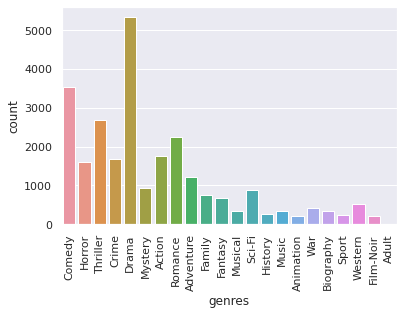

In [24]:
sns.barplot(data=genres, x='name', y='count')
plt.xlabel('genres')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Comedy'),
  Text(1, 0, 'Horror'),
  Text(2, 0, 'Thriller'),
  Text(3, 0, 'Crime'),
  Text(4, 0, 'Drama'),
  Text(5, 0, 'Mystery'),
  Text(6, 0, 'Action'),
  Text(7, 0, 'Romance'),
  Text(8, 0, 'Adventure'),
  Text(9, 0, 'Family'),
  Text(10, 0, 'Fantasy'),
  Text(11, 0, 'Musical'),
  Text(12, 0, 'Sci-Fi'),
  Text(13, 0, 'History'),
  Text(14, 0, 'Music'),
  Text(15, 0, 'Animation'),
  Text(16, 0, 'War'),
  Text(17, 0, 'Biography'),
  Text(18, 0, 'Sport'),
  Text(19, 0, 'Western'),
  Text(20, 0, 'Film-Noir'),
  Text(21, 0, 'Adult')])

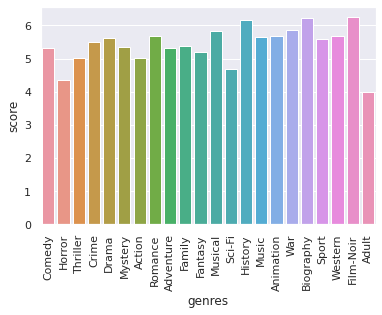

In [25]:
sns.barplot(data=genres, x='name', y='score')
plt.xlabel('genres')
plt.xticks(rotation=90)

In [26]:
from wordcloud import WordCloud, STOPWORDS 

stopwords = set(STOPWORDS) 

def wordcloud(df):
    comment_words = '' 
    # iterate through the csv file 
    for val in df.name: 

        # typecaste each val to string 
        val = str(val).replace(' ', ' ')

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

In [27]:
for df in (genres, actors, directors, keywords, writers):
    wordcloud(df)

NameError: name 'stopwords' is not defined

In [58]:
actors.sort_values(by='count', ascending=False)

,name,category,total_imdb_rating,count,score
1879,John Wayne,actor,240,42,5.714286
4325,Randolph Scott,actor,205,34,6.029412
3762,Eric Roberts,actor,131,33,3.969697
992,James Stewart,actor,195,29,6.724138
1880,Robert Mitchum,actor,171,28,6.107143
...,...,...,...,...,...
9440,Tom Bosley,actor,6,1,6.000000
9442,Leigh Taylor-Young,actor,6,1,6.000000
9445,Jessica Hecht,actor,5,1,5.000000
9446,Matt Winston,actor,5,1,5.000000


In [59]:
directors.sort_values(by='count', ascending=False)

,name,category,total_imdb_rating,count,score
35372,Michael Curtiz,director,212,34,6.235294
35230,Henry Hathaway,director,155,25,6.200000
35332,Richard Thorpe,director,139,24,5.791667
34510,Sidney Lumet,director,138,23,6.000000
35033,Fred Olen Ray,director,81,22,3.681818
...,...,...,...,...,...
37035,Michael D. Moore,director,5,1,5.000000
37032,John McNaughton,director,6,1,6.000000
37031,Jordan Brady,director,5,1,5.000000
37029,John Paragon,director,4,1,4.000000


In [60]:
keywords.sort_values(by='count', ascending=False)

,name,category,total_imdb_rating,count,score
19419,psychotronic film,keyword,2387,515,4.634951
19575,murder,keyword,1701,338,5.032544
19872,female nudity,keyword,1255,271,4.630996
19418,f rated,keyword,1188,228,5.210526
20784,character name as title,keyword,1216,215,5.655814
...,...,...,...,...,...
26707,female film director as character,keyword,6,1,6.000000
26710,kicked in the butt,keyword,7,1,7.000000
26713,reference to hedda gabler,keyword,6,1,6.000000
26714,miniskirt and heels,keyword,5,1,5.000000


In [61]:
writers.sort_values(by='count', ascending=False)

,name,category,total_imdb_rating,count,score
40700,Ben Hecht,writer,272,42,6.476190
40466,Stephen King,writer,136,24,5.666667
41873,Edgar Rice Burroughs,writer,126,23,5.478261
41556,Robert E. Kent,writer,123,22,5.590909
42378,Frank Tashlin,writer,126,21,6.000000
...,...,...,...,...,...
46838,Kevin Shulman,writer,4,1,4.000000
46839,Nathaniel Shulman,writer,4,1,4.000000
46840,Neil P. Varnick,writer,5,1,5.000000
46844,Sol Saks,writer,6,1,6.000000
